#### Импорт базовых библиотек

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#### Импорт необходимых библиотек __```помощников```__

In [91]:
from assets.dataloader.parse_lvds import Parser

from assets.dsp.processing import range_processing 
from assets.dsp.processing import doppler_processing 
from assets.dsp.processing import udoppler_processing

from assets.dsp.utils import getParams 
from assets.dsp.utils import Window

#### Получение списка доступных __```классов```__

In [92]:
dataset_directory = os.path.join('..', '..', 'FMCW_Data', 'rawdata');
classes = os.listdir(dataset_directory);
print(classes);

['circle', 'door_1', 'none_target', 'people']


#### Указание __```директории```__, определенного класса, с необходимыми данными

In [93]:
class_directory = os.path.join(dataset_directory, classes[3]);
print(class_directory);

..\..\FMCW_Data\rawdata\people


#### Создаем объект парсера и получаем список доступных файлов для чтения

In [94]:
parser = Parser(class_directory);
print('Файлов доступно для чтения:', parser.files);

Файлов доступно для чтения: ['adc_data.bin', 'adc_data_1.bin', 'adc_data_2.bin', 'adc_data_3.bin', 'adc_data_4.bin']


#### Организация необходимого файла, по его индексу

In [95]:
adcdata = parser.organize(file_idx = 0);
print(adcdata.shape);

(1024, 128, 4, 256)


#### Проведение Допплеровской обработки для определенного кадра

In [100]:
frame_data = adcdata[50];
fft1d_out = range_processing(frame_data, window_type_1d = Window.BLACKMAN);
fft2d_out = doppler_processing(fft1d_out, window_type_2d = Window.BLACKMAN, 
                               clutter_removal_enabled = True, accumulate = True,
                               interleaved = False);

#### Расчет параметров радара

In [101]:
ranges, velocities, range_res, velocity_res = getParams();

#### Указание минимального и максимального расстояния отображения

In [102]:
range_min, range_max = 0, 30;
range_min = int(np.ceil(range_min / range_res));
range_max = int(np.ceil(range_max / range_res));

fft2d_out_zoom = fft2d_out[range_min:range_max];

#### Результат Допплеровской обработки

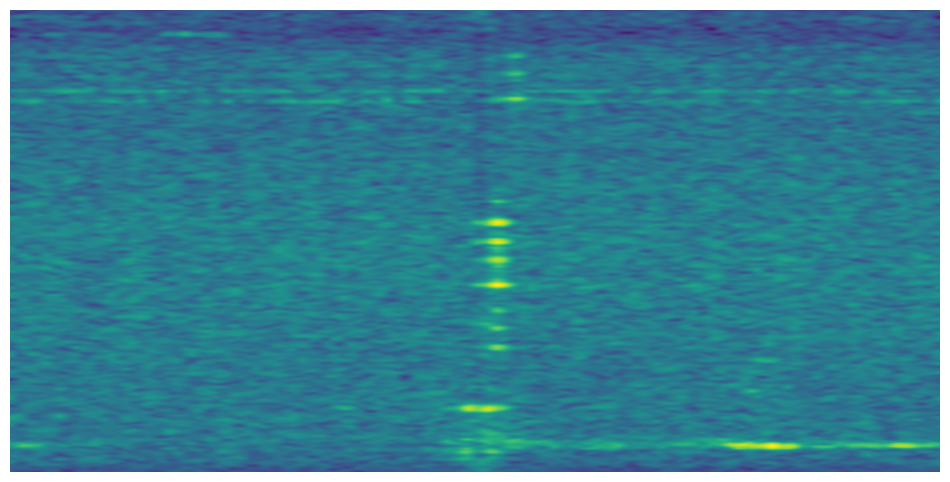

In [103]:
plt.figure(figsize = (12, 6));
plt.axis('off');
plt.imshow(fft2d_out, 
           cmap ='viridis',
           origin = 'lower', 
           interpolation = 'bessel', 
           aspect = 'auto');